# Ejercicios de inferencia paramétrica



In [45]:
%matplotlib inline
import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

from stats_utils import plot_dists

## Ejercicio

En cierto tipo de dispositivos de comunicaciones, la tasa de fallos $\lambda$ depende de cada dispositivo.

Si elegimos un dispositivo al azar, pensamos que la tasa de fallos del dispositivo sigue una distribución $\operatorname{Gamma}(\alpha=2, \beta=2)$.

Nos encargan elegir un dispositivo. Una tasa de 1 fallo / día o menor es compatible con el funcionamiento normal (si hay pocos fallos lo vuelve a intentar y se mantiene la calidad), pero si la tasa es mayor es necesario reemplazar el dispositivo, que es costoso.

Tenemos tres dispositivos, que han sido probados en condiciones diferentes:

 + Uno fue probado 1 día y no falló nunca.
 + Otro fue probado 4 días y falló una vez.
 + Otro fue probado 20 días y falló 7 veces.


Se pide

 - Encuentra la estimación de máxima verosimilitud para la tasa de fallos de cada dispositivo.
 - Actualiza el prior $\operatorname{Gamma}(\alpha=2, \beta=2)$ con los datos, para cada dispositivo por separado.
 - Encuentra la estimación MAP para la tasa de fallos de cada dispositivo.
 - ¿Cuál es la probabilidad, para cada dispositivo, de que la tasa de fallos sea menor que 1 fallo al día?


In [46]:
print('max ver modelo 1', 0/1)
print('max ver modelo 2', 1/4)
print('max ver modelo 3', 7/20)


max ver modelo 1 0.0
max ver modelo 2 0.25
max ver modelo 3 0.35


### Prior y posterior para el modelo 1

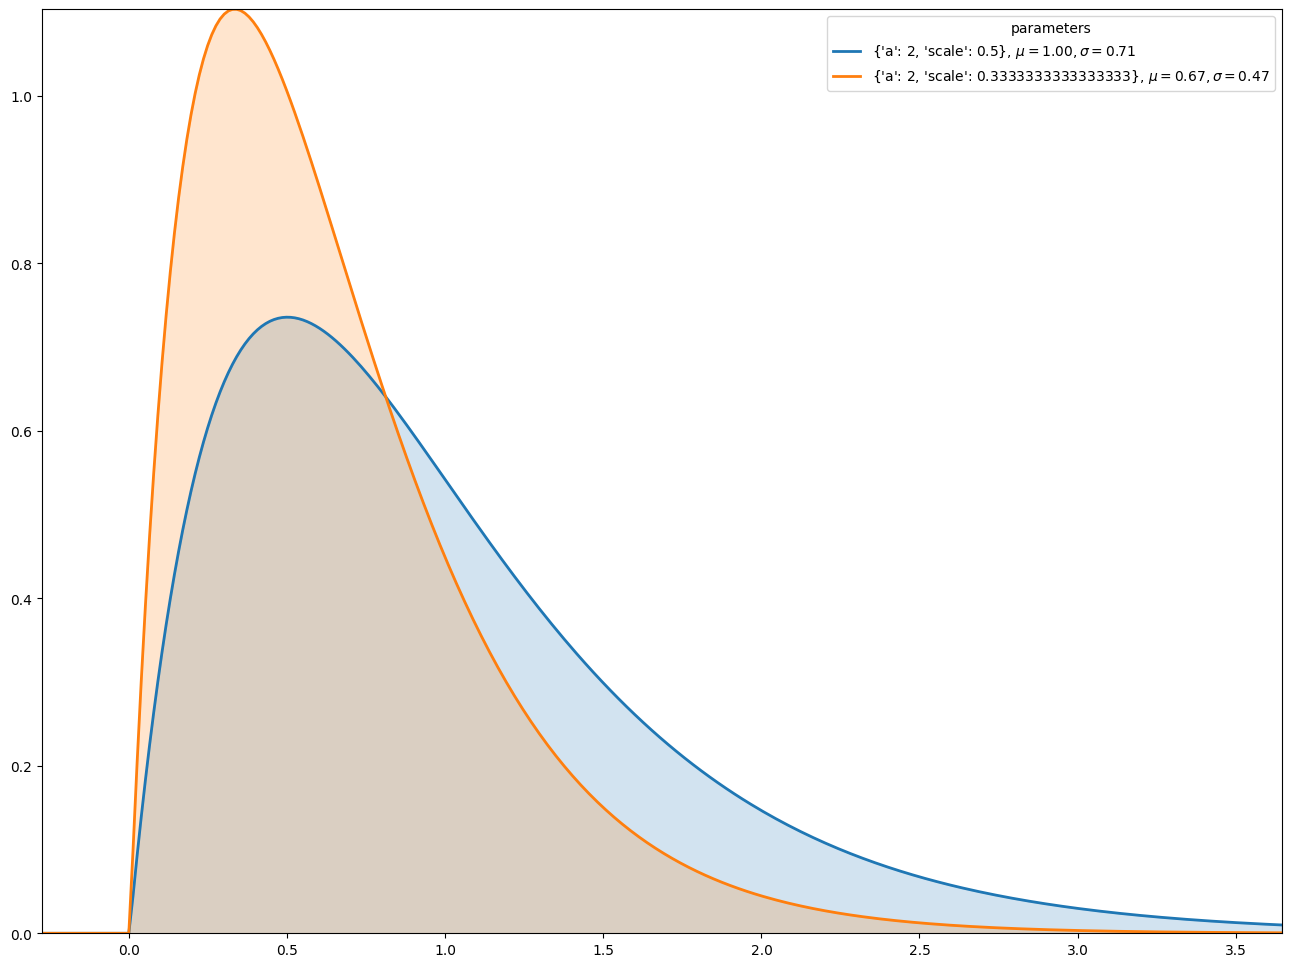

In [47]:
plot_dists([
    #prior
    st.gamma(a=2,scale=1/2),
    st.gamma(a=2+0,scale=1/(2+1))
])

### Prior y posterior para el modelo 2

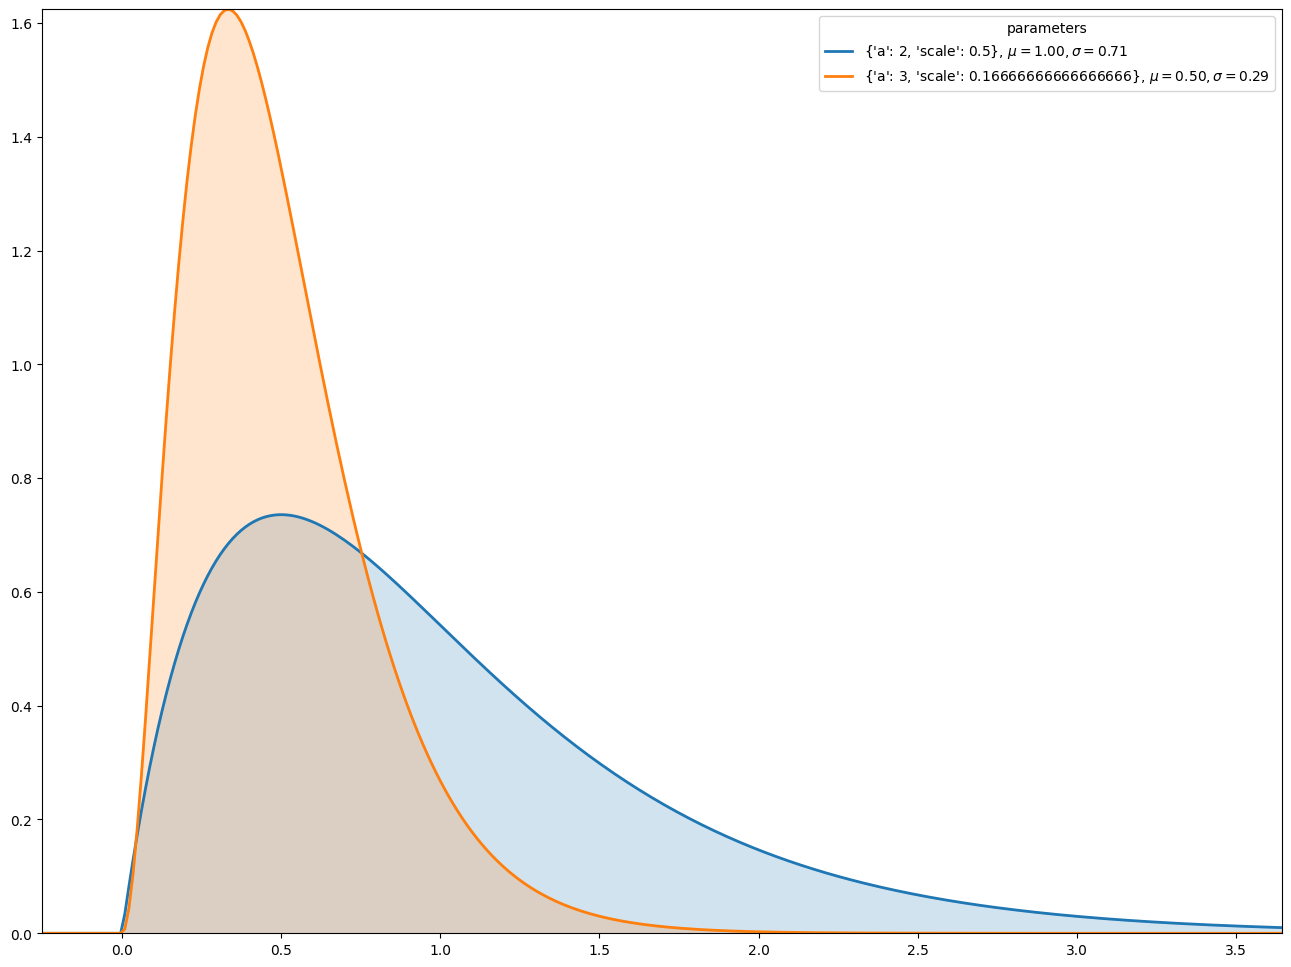

In [48]:
plot_dists([
    #prior
    st.gamma(a=2,scale=1/2),
    st.gamma(a=2+1,scale=1/(2+4))
])

### Prior y posterior para el modelo 3

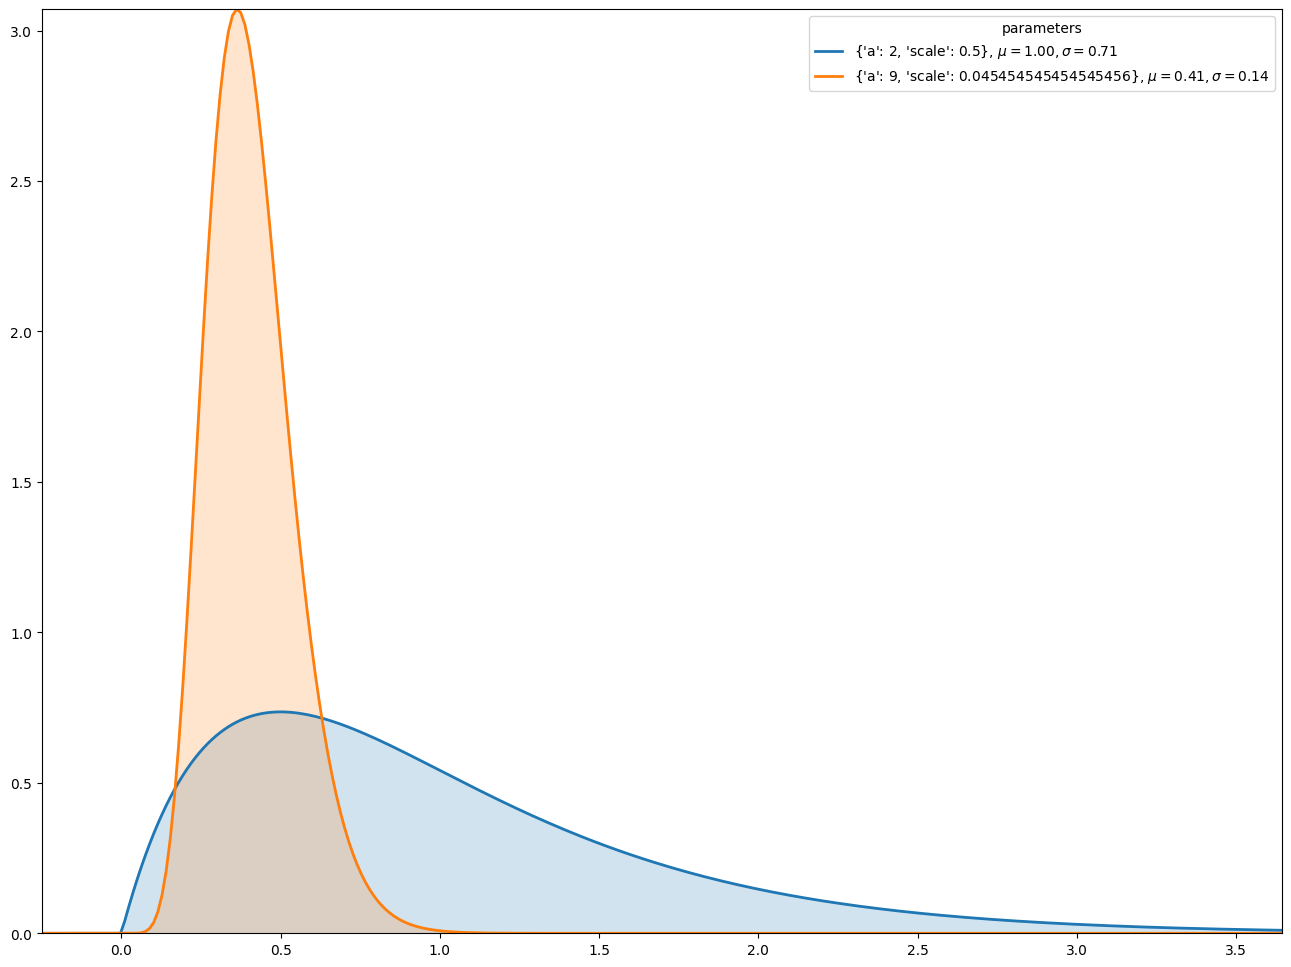

In [49]:
plot_dists([
    #prior
    st.gamma(a=2,scale=1/2),
    st.gamma(a=2+7,scale=1/(2+20))
])

### Todos los posteriors juntos

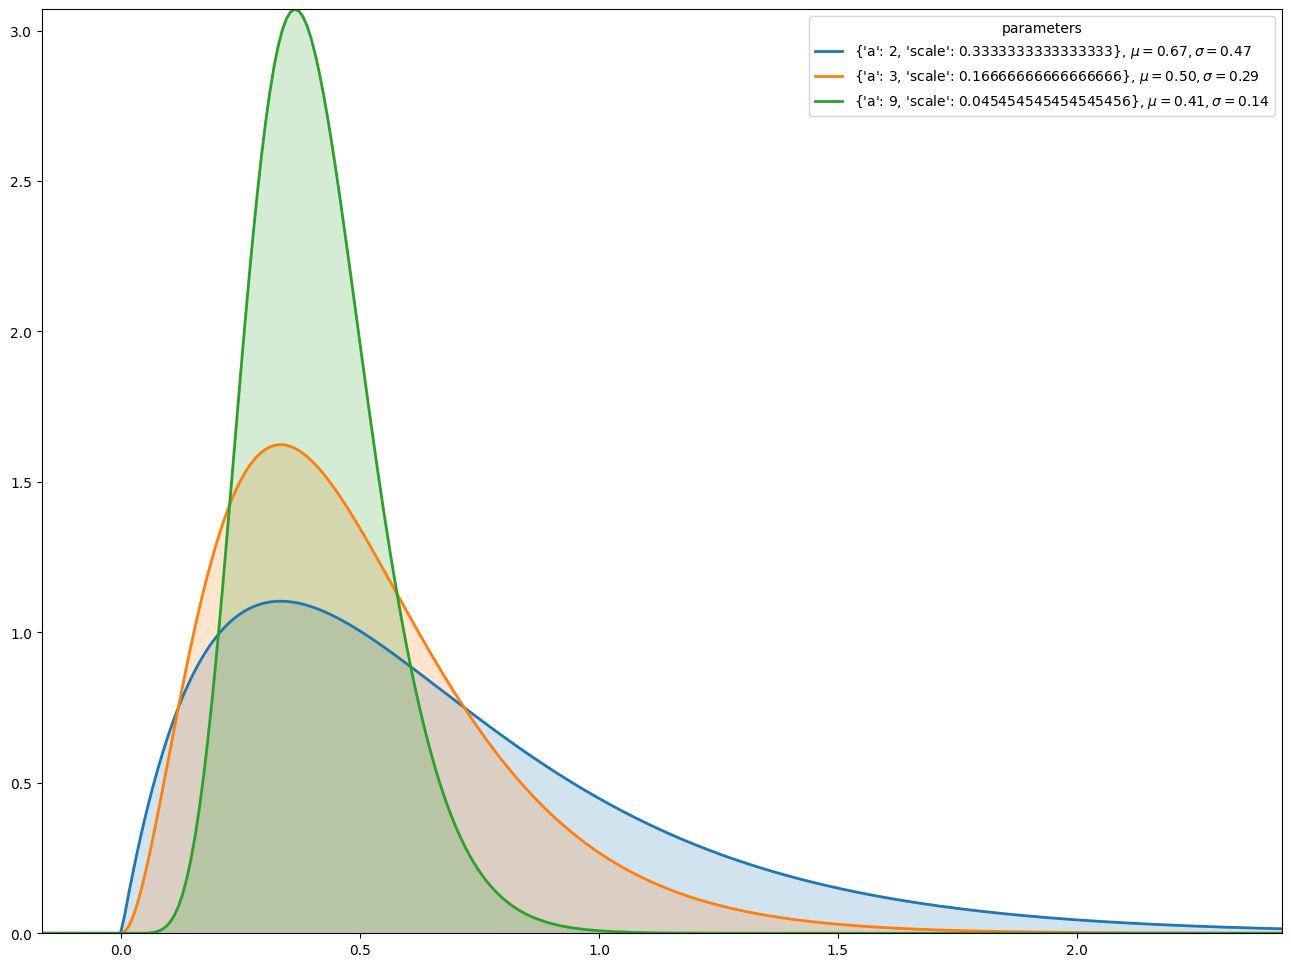

In [50]:
plot_dists([
    st.gamma(a=2+0,scale=1/(2+1)),
    st.gamma(a=2+1,scale=1/(2+4)),
    st.gamma(a=2+7,scale=1/(2+20)),
])

### Estimación MAP para cada modelo

In [51]:
print('MAP modelo 1', (2 + 0 - 1)/(2 + 1) )
print('MAP modelo 2', (2 + 1 - 1)/(2 + 4) )
print('MAP modelo 3', (2 + 7 - 1)/(2 + 20) )


MAP modelo 1 0.3333333333333333
MAP modelo 2 0.3333333333333333
MAP modelo 3 0.36363636363636365


### Probabilidad, para cada dispositivo, de que la tasa de fallos sea menor que 1 fallo al día

In [52]:
print('P(l1<1)=',st.gamma(a=2, scale=1/3).cdf(1))
print('P(l2<1)=',st.gamma(a=2+1, scale=1/(2+4)).cdf(1))
print('P(l3<1)=',st.gamma(a=2+7, scale=1/(2+20)).cdf(1))


P(l1<1)= 0.8008517265285442
P(l2<1)= 0.938031195583341
P(l3<1)= 0.9994230988333771


## Ejercicio

En el artículo siguiente:

> C.R. Weinberg and B.C. Gladen. _The beta-geometric distribution applied to comparative fecundability studies_. Biometrics, 42(3):547–560, 1986.

encontramos una tabla que recoge información sobre cuántos ciclos menstruales tuvieron que esperar mujeres que buscaban quedarse embarazadas, desglosados por mujeres fumadoras y no fumadoras.


| Número de ciclos | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12  | >= 12  |
| --------- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| Fumadoras | 29 | 16 | 17 | 4  |3  |9  |4 | 5 | 1 |1 |1 |  3 | 7  |
| No fumadoras | 198 | 107 | 55 | 38 | 18 | 22 | 7 | 9 | 5 | 3  | 6  |6  |12  |


Se pide

 -  Encuentra un modelo razonable para el fenómeno aleatorio _"número de ciclos menstruales hasta conseguir quedarse embarazada"_: ¿cuáles son los parámetros de este modelo?
 -  Encuentra la estimación de máxima verosimilitud para el parámetro, para cada grupo por separado.
 -  Encuentra la familia conjugada para el modelo elegido.
 -  Elige los valores de los hiperparámetros para un prior de la familia conjugada que corresponda al prior de Jeffreys.
 -  Actualiza tu prior con los datos de la tabla, para cada grupo por separado.
 -  Reporta intervalos de probabilidad al 90\% para cada uno de los dos parámetros (toma el percentil 5\% como el extremo inferior del intervalo de probabilidad y el percentil 95\% como el extremo superior).


### Primera aproximación: ignoramos la columna ">=12"

Ignoramos la columna ">=12", ya que no corresponde a observaciones de una geométrica.
Más detalle un poco más adelante, y/o en el [vídeo con la solución](https://drive.upm.es/s/yA4VOI4HdbDecvY)



In [141]:
fumadoras =  [29, 16, 17, 4 ,3 ,9 ,4, 5, 1,1,1,  3, 7]
no_fumadoras = [198, 107, 55, 38, 18, 22, 7, 9, 5, 3 , 6 ,6 ,12]
fumadoras_geom = fumadoras[:-1]
no_fumadoras_geom = no_fumadoras[:-1]

### Fumadoras

In [142]:
# número total de mujeres fumadoras
n_fuma = sum(fumadoras_geom)
n_fuma

93

In [143]:
# número total de ciclos menstruales considerados en el estudio
# para las mujeres fumadoras
# 29*1+ 16*2 + 17*3 + ...
nintentos_fuma = sum(m*(j+1)  for j,m in enumerate(fumadoras_geom))
nintentos_fuma

331

### No fumadoras

In [144]:
n_nofuma= sum(no_fumadoras_geom)
n_nofuma

474

In [145]:
# número total de ciclos menstruales considerados en el estudio
# para las mujeres no fumadoras
# 198*1 + 107*2 + ...
nintentos_nofuma = sum(m*(j+1)  for j,m in enumerate(no_fumadoras_geom))
nintentos_nofuma

1285

### Máxima verosimilitud

In [146]:
max_ver_fuma = n_fuma/nintentos_fuma
print('''Estimación de máxima verosimilitud para la prob de que
una mujer fumadora se quede embarazada en un ciclo menstrual
en el que lo ha intentado:''',
      max_ver_fuma)

Estimación de máxima verosimilitud para la prob de que
una mujer fumadora se quede embarazada en un ciclo menstrual
en el que lo ha intentado: 0.2809667673716012


In [147]:
max_ver_no_fuma = n_nofuma/nintentos_nofuma
print('''Estimación de máxima verosimilitud para la prob de que
una mujer *no* fumadora se quede embarazada en un ciclo menstrual
en el que lo ha intentado:''',
      max_ver_no_fuma)

Estimación de máxima verosimilitud para la prob de que
una mujer *no* fumadora se quede embarazada en un ciclo menstrual
en el que lo ha intentado: 0.3688715953307393


### Inferencia paramétrica bayesiana

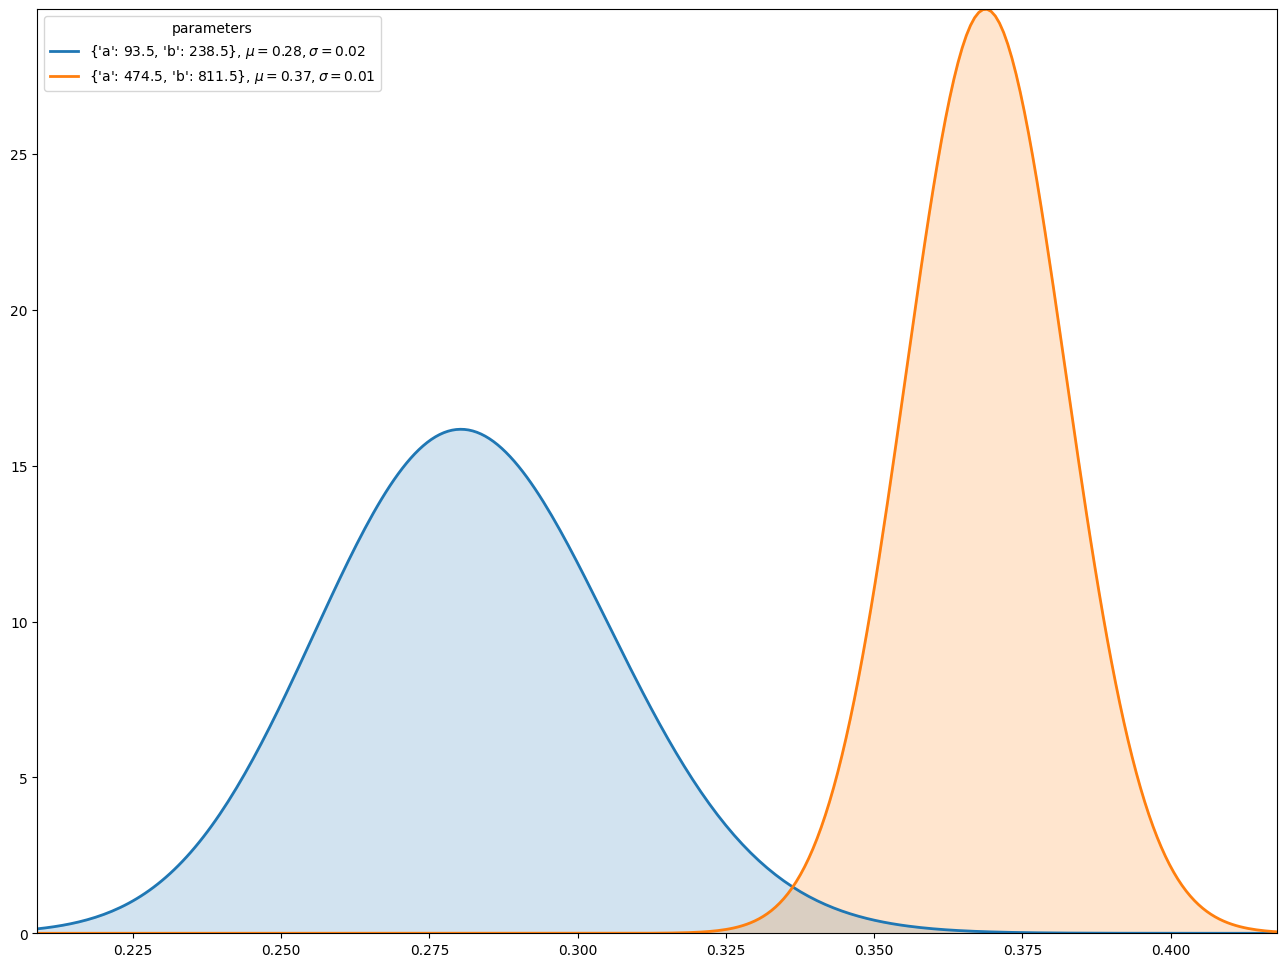

In [148]:
aprior = 0.5
bprior = 0.5
# Fumadoras
n_exitos_fuma = n_fuma
n_fracasos_fuma = nintentos_fuma - n_exitos_fuma
a_fuma = aprior + n_exitos_fuma
b_fuma = bprior + n_fracasos_fuma
# No fumadoras
n_exitos_nofuma = n_nofuma
n_fracasos_nofuma = nintentos_nofuma - n_exitos_nofuma
a_no_fuma = aprior + n_exitos_nofuma
b_no_fuma = bprior + nintentos_nofuma - n_exitos_nofuma
plot_dists([
    st.beta(a=a_fuma, b=b_fuma),
    st.beta(a=a_no_fuma, b=b_no_fuma)
])

### Variante: binomial en vez de geométrica

Alternativamente, podemos considerar que cada entrada en la tabla se reduce a una serie de intentos infructuosos seguidos de un intento final exitoso, salvo por la última columna en la que hay 12 intentos infructuosos, y no sabemos si finalmente la mujer consiguió quedarse embarazada.

Si ignoramos la última columna, obtenemos los mismos datos, y al incorporarla el resultado cambia ligeramente.

### Fumadoras

In [149]:
# número total de mujeres fumadoras
n_fuma = sum(fumadoras)
n_fuma

100

In [150]:
# número total de ciclos menstruales considerados en el estudio
# para las mujeres no fumadoras
# 198*1 + 107*2 + ...
nintentos_fuma = sum(m*(j+1)  for j,m in enumerate(fumadoras))
nintentos_fuma

422

In [151]:
# Las mujeres de la última columna no las contamos como
# éxitos porque no consiguieron quedarse embarazadas
n_exitos_fuma = sum(fumadoras[:-1])
n_fracasos_fuma = nintentos_fuma - n_exitos_fuma
n_exitos_fuma, n_fracasos_fuma

(93, 329)

### No fumadoras

In [152]:
n_nofuma= sum(no_fumadoras)
n_nofuma

486

In [153]:
# número total de ciclos menstruales considerados en el estudio
# para las mujeres no fumadoras
# 198*1 + 107*2 + ...
nintentos_nofuma = sum(m*(j+1)  for j,m in enumerate(no_fumadoras))
nintentos_nofuma

1441

In [154]:
# Las mujeres de la última columna no las contamos como
# éxitos porque no consiguieron quedarse embarazadas
n_exitos_nofuma = sum(no_fumadoras[:-1])
n_fracasos_nofuma = nintentos_nofuma - n_exitos_nofuma
n_exitos_nofuma, n_fracasos_nofuma

(474, 967)

### Máxima verosimilitud

In [155]:
max_ver_fuma = n_fuma/nintentos_fuma
print('''Estimación de máxima verosimilitud para la prob de que
una mujer fumadora se quede embarazada en un ciclo menstrual
en el que lo ha intentado:''',
      max_ver_fuma)

Estimación de máxima verosimilitud para la prob de que
una mujer fumadora se quede embarazada en un ciclo menstrual
en el que lo ha intentado: 0.23696682464454977


In [156]:
max_ver_no_fuma = n_nofuma/nintentos_nofuma
print('''Estimación de máxima verosimilitud para la prob de que
una mujer *no* fumadora se quede embarazada en un ciclo menstrual
en el que lo ha intentado:''',
      max_ver_no_fuma)

Estimación de máxima verosimilitud para la prob de que
una mujer *no* fumadora se quede embarazada en un ciclo menstrual
en el que lo ha intentado: 0.33726578764746706


### Inferencia paramétrica bayesiana

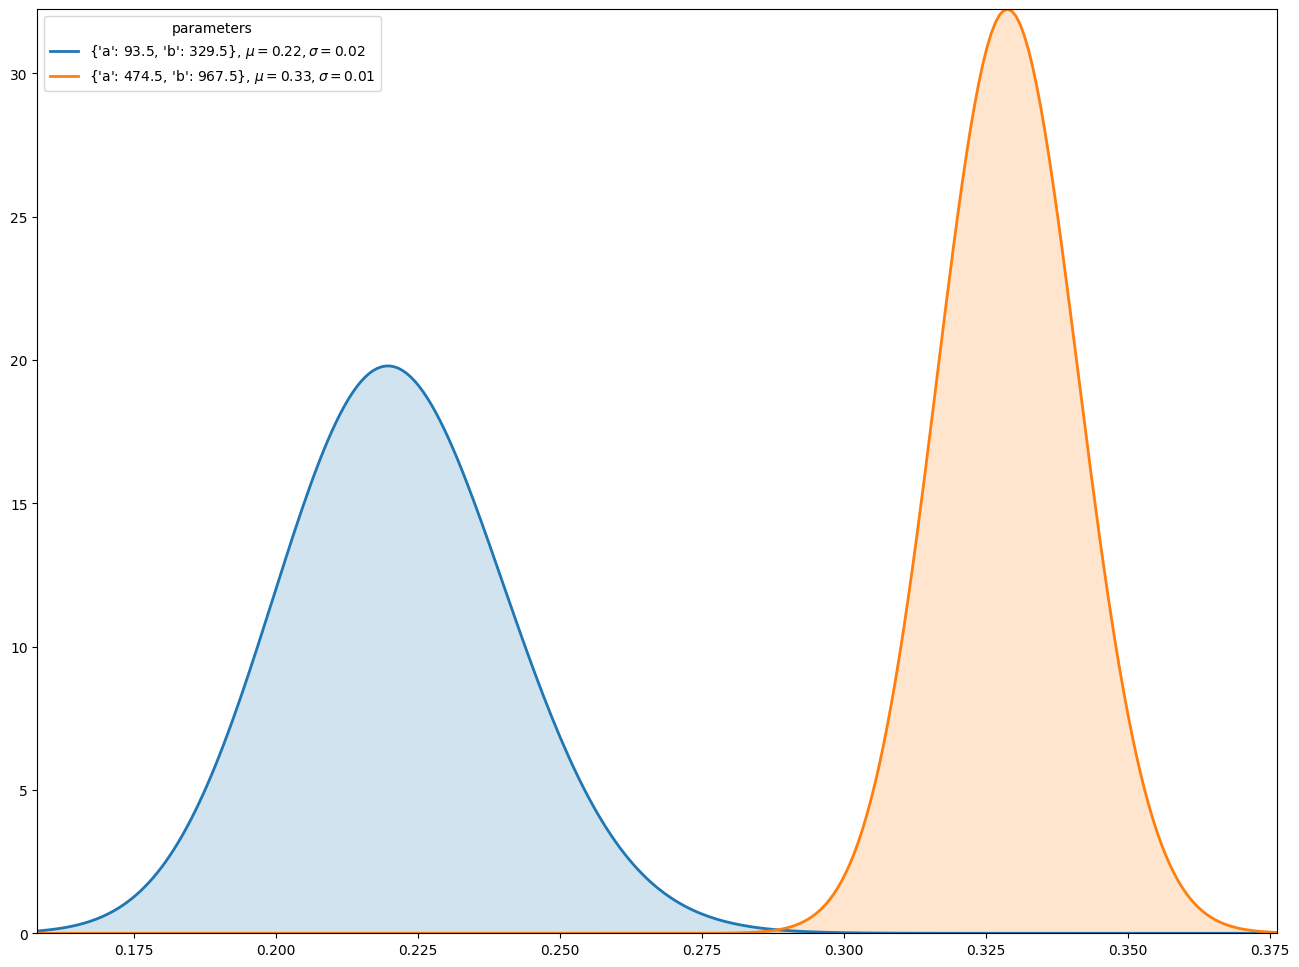

In [157]:
aprior = 0.5
bprior = 0.5
# Fumadoras
a_fuma = aprior + n_exitos_fuma
b_fuma = bprior + n_fracasos_fuma
# No fumadoras
a_no_fuma = aprior + n_exitos_nofuma
b_no_fuma = bprior + nintentos_nofuma - n_exitos_nofuma
plot_dists([
    st.beta(a=a_fuma, b=b_fuma),
    st.beta(a=a_no_fuma, b=b_no_fuma)
])